In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import lib.utils as utils

In [3]:
timus = pandas.read_csv('../data/timus.csv', index_col=0)

/home/ec2-user/mount_point/tfnewenv/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
timus.columns

Index(['author_id', 'date', 'execution_time', 'judgement_result', 'language',
       'memory_used', 'problem_id', 'submit_id', 'test_number'],
      dtype='object')

In [17]:
timus.head()

,author_id,date,execution_time,judgement_result,language,memory_used,problem_id,submit_id,test_number
0,10004,2000-04-28 10:15:41,0.02,Accepted,Intel C++ 7,85,1000,184,0
1,10005,2000-05-12 13:13:38,0.00,Compilation error,Intel C++ 7,0,1000,185,0
2,10020,2000-09-22 15:58:11,0.01,Accepted,FreePascal 1.0.6,117,1000,220,0
3,10022,2000-09-26 17:17:34,0.01,Accepted,Intel C++ 7,81,1000,247,0
4,10033,2000-09-26 18:21:55,0.00,Compilation error,FreePascal 1.0.6,0,1000,276,0


In [18]:
timus.tail()

,author_id,date,execution_time,judgement_result,language,memory_used,problem_id,submit_id,test_number
7315339,249913,2018-05-28 23:45:40,2.028,Time limit exceeded,G++ 7.1,404,1086,7897074,2
7315340,249902,2018-05-28 23:48:47,0.000,Compilation error,GCC 7.1,0,1724,7897075,0
7315341,249902,2018-05-28 23:49:16,0.001,Wrong answer,G++ 7.1,436,1724,7897076,8
7315342,231931,2018-05-28 23:50:52,1.294,Running,G++ 7.1,416,1798,7897077,0
7315343,241093,2018-05-28 23:51:05,0.001,Accepted,G++ 7.1,432,1000,7897078,0


In [20]:
len(set(timus.author_id))

134214

In [5]:
filtered_timus = utils.filter_timus_by_unique_accepted(timus, lambda cnt: cnt > 100)

In [6]:
len(set(filtered_timus.author_id))

3247

In [16]:
def get_lang(lang):
    substrs = ['C++', 'FreePascal', 'Java', 'C#', 'Python', 'Ruby', 'Go', 'Scala', 'Rust', 'VB.NET', 'Kotlin', 'Haskell']
    for sub in substrs:
        if sub in lang:
            return sub
    if 'Clang++' in lang or 'G++' in lang:
        return 'C++'
    if 'C' in lang:
        return 'C'
    return None

In [17]:
for x in set(timus['language']):
    print(x, '=>', get_lang(x))

Rust 1.25 => Rust
Java 1.5 => Java
Clang++ 4.0.1 => C++
FreePascal 1.0.6 => FreePascal
G++ 4.7 => C++
GCC 4.9 C11 => C
G++ 4.7 C++11 => C++
Java 1.8 => Java
FreePascal 2.0.4 => FreePascal
Haskell 7.6 => Haskell
Intel C++ 7 => C++
Visual C++ 2010 => C++
Java 1.6 => Java
Intel C 7 => C
Visual C# 2008 => C#
VB.NET 2010 => VB.NET
Visual C# 2010 => C#
GCC 4.9 => C
GCC 4.7 C11 => C
Clang 3.5 C++14 => C++
Python 3.6 => Python
FreePascal 2.6 => FreePascal
Go 1.3 => Go
Kotlin 1.1.4 => Kotlin
Visual C++ 2013 => C++
Scala 2.11 => Scala
Visual C# 2017 => C#
Java 1.7 => Java
Visual C 2017 => C
GCC 7.1 => C
Python 3.4 => Python
Visual C 2013 => C
G++ 4.9 C++11 => C++
G++ 7.1 => C++
G++ 4.9 => C++
Visual C++ 2017 => C++
Visaul C# 2005 => C#
Python 3.3 => Python
FreePascal 2.0.2 => FreePascal
Scala 2.10 => Scala
FreePascal 2.0.1 => FreePascal
Visual C 2010 => C
Rust 1.9 => Rust
Ruby 1.9 => Ruby
GCC 4.7 => C
Python 2.7 => Python


In [25]:
timus['language']=timus['language'].apply(get_lang)

In [26]:
timus.groupby(['language']).size().sort_values(ascending=False)

language
C++           4235795
FreePascal    1706313
Java           516028
C              417290
C#             241567
Python         165229
Ruby             8830
Go               7917
Haskell          7494
Scala            6029
Rust             1463
VB.NET           1030
Kotlin            359
dtype: int64

In [26]:
timus.groupby(['judgement_result']).size().sort_values(ascending=False)

judgement_result
Wrong answer                                        3205663
Accepted                                            2181510
Compilation error                                    661185
Time limit exceeded                                  635723
Runtime error (access violation)                     243036
Memory limit exceeded                                136620
Runtime error                                        107471
Runtime error (stack overflow)                        50606
Runtime error (integer division by zero)              27621
Output limit exceeded                                 26872
Runtime error (floating-point invalid operation)      14123
Runtime error (non-zero exit code)                    13106
Runtime error (floating-point division by zero)        5011
Restricted function                                    3627
Idleness limit exceeded                                2010
Runtime error (floating-point overflow)                 520
Runtime error (integer 

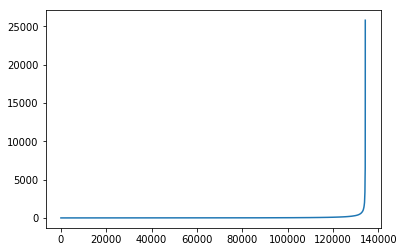

In [42]:
tmp = timus.groupby(['author_id']).size().sort_values()
plt.plot(range(len(tmp)), tmp)

In [43]:
timus.groupby(['author_id']).size().describe()

count    134214.000000
mean         54.505074
std         299.056013
min           1.000000
25%           2.000000
50%           7.000000
75%          28.000000
max       25775.000000
dtype: float64

In [51]:
(
    timus
        .groupby(['author_id'])
        .filter(lambda x: len(x) > 55)
        .groupby(['author_id'])
        .size()
        .sort_values()
        .describe()
)

count    20910.000000
mean       293.440698
std        711.078795
min         56.000000
25%         80.000000
50%        129.000000
75%        260.000000
max      25775.000000
dtype: float64

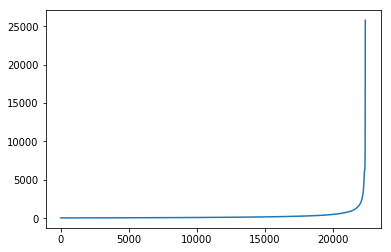

In [54]:
tmp = (
    timus
        .groupby(['author_id'])
        .filter(lambda x: len(x) > 50)
        .groupby(['author_id'])
        .size()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

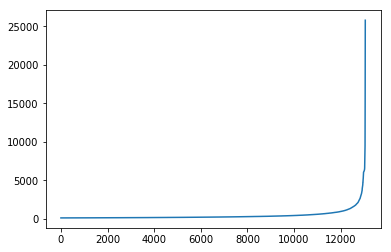

In [55]:
tmp = (
    timus
        .groupby(['author_id'])
        .filter(lambda x: len(x) > 100)
        .groupby(['author_id'])
        .size()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

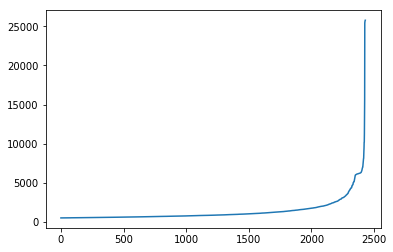

In [56]:
tmp = (
    timus
        .groupby(['author_id'])
        .filter(lambda x: len(x) > 500)
        .groupby(['author_id'])
        .size()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

In [68]:
(
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 14)
        .groupby('author_id')['problem_id']
        .nunique()
        .describe()
)

count    18885.000000
mean        69.157479
std         98.338754
min         15.000000
25%         22.000000
50%         35.000000
75%         71.000000
max       1104.000000
Name: problem_id, dtype: float64

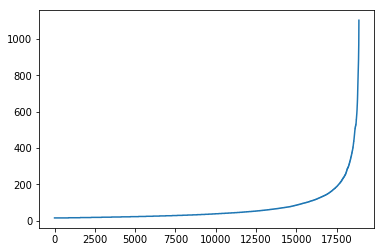

In [64]:
tmp = (
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 14)
        .groupby('author_id')['problem_id']
        .nunique()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

In [69]:
(
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 50)
        .groupby('author_id')['problem_id']
        .nunique()
        .describe()
)

count    6676.000000
mean      146.257939
std       134.110467
min        51.000000
25%        67.000000
50%        98.000000
75%       165.000000
max      1104.000000
Name: problem_id, dtype: float64

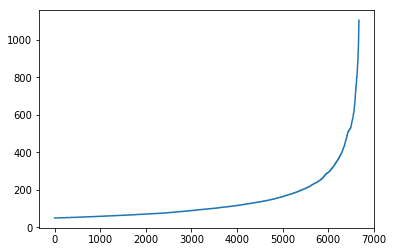

In [67]:
tmp = (
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 50)
        .groupby('author_id')['problem_id']
        .nunique()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

In [ ]:
(
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 200)
        .groupby('author_id')['problem_id']
        .nunique()
        .describe()
)

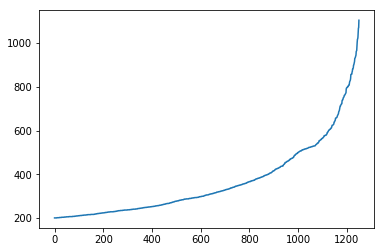

In [66]:
tmp = (
    timus[timus.judgement_result == 'Accepted']
        .groupby('author_id')
        .filter(lambda x: len(set(x['problem_id'])) > 200)
        .groupby('author_id')['problem_id']
        .nunique()
        .sort_values()
)
plt.plot(range(len(tmp)), tmp)

In [7]:
utils.DEFAULT_TESTING_DATES

[datetime.datetime(2017, 12, 6, 0, 0),
 datetime.datetime(2017, 6, 9, 0, 0),
 datetime.datetime(2016, 12, 11, 0, 0),
 datetime.datetime(2016, 6, 14, 0, 0),
 datetime.datetime(2015, 12, 17, 0, 0),
 datetime.datetime(2015, 6, 20, 0, 0),
 datetime.datetime(2014, 12, 22, 0, 0),
 datetime.datetime(2014, 6, 25, 0, 0),
 datetime.datetime(2013, 12, 27, 0, 0),
 datetime.datetime(2013, 6, 30, 0, 0),
 datetime.datetime(2013, 1, 1, 0, 0),
 datetime.datetime(2012, 7, 5, 0, 0)]